# Customer Segmentation Project

Importing the dependencies

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

Data Collection & Analysis

In [5]:
# loading the dataset into a dataframe
customerData = pd.read_csv('/content/Mall_Customers.csv')

In [6]:
# first 5 rows
customerData.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
# dimensions of the dataset
customerData.shape

(200, 5)

In [8]:
# getting some more information
customerData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
# checking for missing values seperately
customerData.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


> We want to group the customers on the basis of their spending behaviour, so we don't need the unnecessary columns

Choosing Annual Income & Spending Score columns only

In [10]:
X = customerData.iloc[:,[3,4]].values

In [11]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

Choosing the correct number of clusters that is suitable for this dataset

WCSS --> Withing Cluster Sum of Squares

> when a particular number of clusters produce the least WCSS value, then that's the correct count of required clusters

In [12]:
# finding WCSS for different number of clusters

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)                # fitting our data to the KMeans algo
  wcss.append(kmeans.inertia_)  # this functions gives the WCSS value

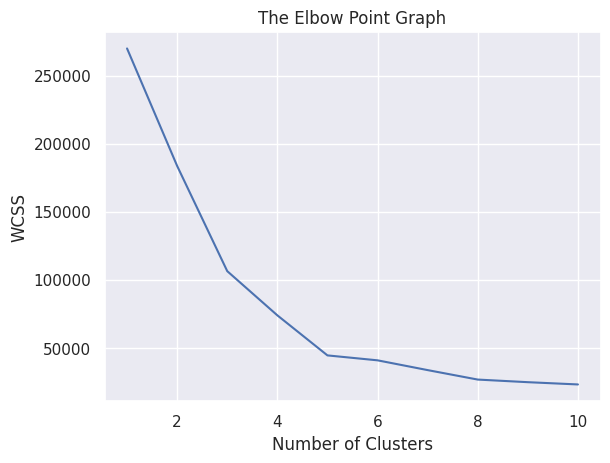

In [13]:
# plotting an elbow graph to find which cluster has minimum value
sns.set()
plt.plot(range(1,11), wcss)
plt.title("The Elbow Point Graph")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

So, how does this graph justify the number of clusters needed?
- The point after which there's no significant drop is chosen. For this case, it's 5 after which no remarkable drop can be seen!
- Optimum number of cluster is 5

Training the K-Means Clustering Model


In [14]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)         # will return cluster number for each data point
print(Y)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


5 clusters = 0,1,2,3,4

Visualizing all the clusters and these data points

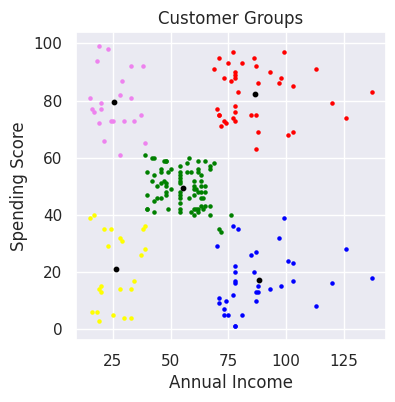

In [21]:
# plotting all the clusters

plt.figure(figsize=(4,4))
plt.scatter(X[Y==0,0], X[Y==0,1], s=5, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=5, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=5, c='blue', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=5, c='yellow', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=5, c='violet', label='Cluster 5')

# plotting the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=10, c='black', label='Centroids')

plt.title("Customer Groups")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()